In [ ]:
print('hello world')

hello world


In [45]:
import cupy as cp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# Simulation parameters
NUM_STARS = 3 # Number of stars
# GRV_CONST = 6.67430e-11  # Gravitational constant
GRV_CONST = -0.01  # Gravitational constant
TIME_STEP = 0.1  # Time step
# MASS_MIN = 1e21  # Minimum mass
# MASS_MAX = 1e24  # Maximum mass
MASS_MIN = 0.1  # Minimum mass
MASS_MAX = 1.0  # Maximum mass

PLOT_LIM = 1


In [48]:
# Initialize positions, velocities, and masses
positions = cp.random.uniform(-1, 1, (NUM_STARS, 2))  # Random positions in 2D space
# print('Positions:')
# print(positions)

velocities = cp.zeros((NUM_STARS, 2))  # Initial velocities
masses = cp.random.uniform(MASS_MIN, MASS_MAX, NUM_STARS)  # Random masses
colors = np.random.rand(NUM_STARS, 3)

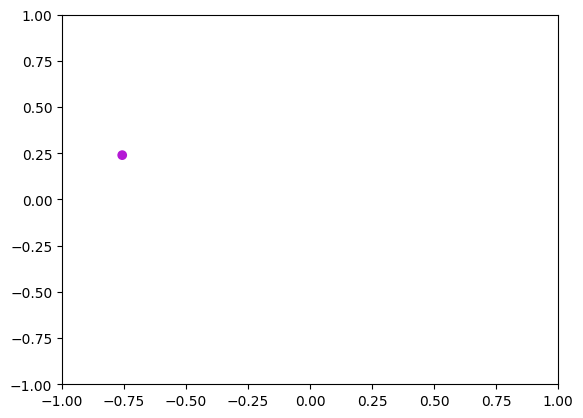

In [50]:
fig, ax = plt.subplots()
lpos = positions.get()
scatter = ax.scatter(lpos[:,0], lpos[:,1], c=colors)
ax.set_xlim(-PLOT_LIM, PLOT_LIM)
ax.set_ylim(-PLOT_LIM, PLOT_LIM)

def update(frame):
    global positions
    global masses
    global velocities

    # Calculate the gravitational forces
    diff = positions[:, cp.newaxis, :] - positions[cp.newaxis, :, :]
    dist_squared = cp.sum(diff ** 2, axis=-1) + 1e-9
    dist = cp.sqrt(dist_squared)
    forces = GRV_CONST * masses[:, cp.newaxis] * masses / dist_squared
    forces_matrix = forces[:, :, cp.newaxis] * diff / dist[:, :, cp.newaxis]
    net_forces = cp.sum(forces_matrix, axis=1)

    # Calculate the new velocities
    velocities += net_forces / masses[:, cp.newaxis] * TIME_STEP

    # Calculate the new positions
    positions += velocities * TIME_STEP

    lpos = positions.get()

    # print(dir(scatter))
    scatter.set_offsets([lpos[:,0], lpos[:,1]])
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=True)

# Display the animation in Colab
from IPython.display import HTML
HTML(ani.to_jshtml())


In [28]:
print(positions)


[[ 5.05888764e+00 -9.28512618e-01]
 [-4.18361037e+00 -4.04899378e+00]
 [-9.52703940e+00  2.47289029e+01]
 [ 3.37922558e-01  3.90493057e+00]
 [ 1.30360654e+02 -4.73000132e+01]
 [ 1.56639136e-02  1.80043279e-01]
 [ 4.44724968e+00  3.19017182e+00]
 [ 3.31651990e+01  2.21288959e+00]
 [-7.03455155e+00  8.42136991e-01]
 [-1.83895953e+01 -1.21036910e+00]
 [ 9.12541482e+00 -3.15538923e-01]
 [-4.35770706e+00  3.37805786e+00]
 [-1.11960160e+01 -5.25845485e+00]
 [ 2.73193389e+00  4.90349060e+00]
 [-4.97070427e+00  1.21452038e+01]
 [ 3.69685072e+00  7.77216396e+00]
 [ 1.69856187e+00  9.63157357e+00]
 [ 6.07375033e+00  6.03240390e+00]
 [ 2.23322302e+00  4.23535484e+00]
 [ 1.05894122e+01 -8.48650435e-02]
 [-1.99618709e+00  8.82062603e+00]
 [-7.92072391e+00 -4.95613446e+00]
 [-1.62888650e+01 -6.99979259e-01]
 [-4.03049138e+00 -8.45664197e+00]
 [ 2.38993150e+00  1.68532243e+00]
 [ 2.09023132e+00 -4.61830357e+00]
 [ 6.61757394e+00 -4.66479306e+00]
 [ 1.81540820e+00  5.70155778e+00]
 [-6.93507347e+00 -1